<a href="https://colab.research.google.com/github/taticorrea/monografia/blob/master/WD_REL_NREL_NEWTON_TOV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import csv
import math as mt

#Constantes

In [ ]:
#constantes
G = 6.67408E-11 #N.m²/kg²
Msol = 1.98892E+30 #kg
Rsol = 696340  #m
hbar = 1.054571726E-34 #J.s
c = 2.99792458E+8                                #m/s
me = 9.10938e-31   #kg
mn = 1.674928E-27  #kg
A_Z_He = 4/2 #2He
A_Z_C = 12/6 #12C
R0 = 1.473 #m
e_zero = me**4*c**5/(np.pi**2*hbar**3)


###### caso nao-rel
gamman = 5/3 
alfan = 0.05 #km
knaorel = (hbar**2/(15*np.pi**2*me))*((3*np.pi**2*2/(4*mn*c**2)))**(5/3)  
betan = 0.005924 #1/km^3 artigo
un = 1/gamman
e_zero_nrel = 2.4881E+36

###### caso rel
e_zero_rel = 7.4631E+38
gamma = 4/3
krel = (hbar*c/(12*np.pi**2))*((3*np.pi**2*2/(4*mn*c**2))**(4/3))
alfa = R0 #km
beta = 52.46 #artigo
u = 1/gamma

#EoS

In [ ]:
k = 1E-23
delta = 1E-23
while k < 2*me*c:  #2 (edo)/9(eos)
  x = k/(me*c)
  e_C = (e_zero/8)*((2*x**3 + x)*((1  + x**2)**(1/2)) - mt.asinh(x)) + (x**3*(A_Z_C)*me**3*mn*c**5)/(3*np.pi**2*hbar**3)
  e_He = (e_zero/8)*((2*x**3 + x)*((1  + x**2)**(1/2)) - mt.asinh(x)) + (x**3*(A_Z_He)*me**3*mn*c**5)/(3*np.pi**2*hbar**3)
  P = (e_zero/24)*((2*x**3 - 3*x)*(1 + x**2)**(1/2) + 3*mt.asinh(x))
  with open('pressao_energia_C_2.csv', 'a', newline='') as file:
    writter = csv.writer(file)
    writter.writerow([k,e_C,P])
  #with open('pressao_energia_He.csv', 'a', newline='') as file:
  #  writter = csv.writer(file)
  #  writter.writerow([k,e_He,P])
  #print(x,k)
  k = k + delta


k = 1E-23
delta = 1E-23
while k < 9*me*c:  #2 (edo)/9(eos)
  x = k/(me*c)
  e_C = (e_zero/8)*((2*x**3 + x)*((1  + x**2)**(1/2)) - mt.asinh(x)) + (x**3*(A_Z_C)*me**3*mn*c**5)/(3*np.pi**2*hbar**3)
  e_He = (e_zero/8)*((2*x**3 + x)*((1  + x**2)**(1/2)) - mt.asinh(x)) + (x**3*(A_Z_He)*me**3*mn*c**5)/(3*np.pi**2*hbar**3)
  P = (e_zero/24)*((2*x**3 - 3*x)*(1 + x**2)**(1/2) + 3*mt.asinh(x))
  with open('pressao_energia_C_9.csv', 'a', newline='') as file:
    writter = csv.writer(file)
    writter.writerow([k,e_C,P])

  k = k + delta

pe_C_2 = pd.read_csv('pressao_energia_C_2.csv', names=['k','dens. energia (J/m3)','pressao (N/m2)'])
pe_C_9 = pd.read_csv('pressao_energia_C_9.csv', names=['k','dens. energia (J/m3)','pressao (N/m2)'])
#pe_He = pd.read_csv('pressao_energia_He.csv', names=['k','dens. energia (J/m3)','pressao (N/m2)'])_

#Runge Kutta 4ordem

13 (25) - 14 (24) ... 17 (21)

##Caso relativistico


In [ ]:
#Passo
h = 0.5 #com var km
#h = 500

#Funcoes
def f(R,P,M): #dp/dr
  return -(alfa*(P**u*M))/(R**2)

def g(R,P,M): #dM/dr
  return beta*R**2*(P**u)

#Condicoes iniciais
R = 1E-2
M = 0 
P = 5.62e-13

#Print das condicoes iniciais
print('P[0]:',P*1e+38,' M[0]:',M,'  R[0]:',R)
#print('P[0]:',P,' M[0]:',M/Msol,'  R[0]:',R*1e-3)

#Abrindo arquivo e salvando CI
with open('WD-NEWTON_rel-5e13.csv', 'a', newline='') as file:
  writter = csv.writer(file)
  writter.writerow(['p (N/m2)','m (Msol)','R (km)'])
  writter.writerow([P*1e+38,M,R])
  #writter.writerow([P,M/Msol,R*1e-3])

while P > 0:             
  k1P = h*f(R,       P,              M )    
  k1M = h*g(R,       P,              M)
  k2P = h*f(R + h/2, P + k1P/2, M + k1M/2)
  k2M = h*g(R + h/2, P + k1P/2, M + k1M/2)
  k3P = h*f(R + h/2, P + k2P/2, M + k2M/2)
  k3M = h*g(R + h/2, P + k2P/2, M + k2M/2)
  k4P = h*f(R + h,   P + k3P, M + k3M)
  k4M = h*g(R + h,   P + k3P, M + k3M)
  with open('WD-NEWTON_rel-5e13.csv', 'a', newline='') as file:
    writter = csv.writer(file)
    writter.writerow([P*1E+38,M,R])
    #writter.writerow([P,M/Msol,R*1e-3]) 
    P = P + (1/6)*(k1P + 2*k2P + 2*k3P + k4P)
    M = M + (1/6)*(k1M + 2*k2M + 2*k3M + k4M)
    R = R + h
    print('P:',P*1e+38,' M:',M,'  R:',R)
    #print('P:',P,' M:',M/Msol,'  R:',R*1e-3)
    #print('k1P:','{:e}'.format(k1P),'k2P:','{:e}'.format(k2P),'k3P:','{:e}'.format(k3P),'k4P:','{:e}'.format(k4P))
    #print('k1M:','{:e}'.format(k1M),'k2M:','{:e}'.format(k2M),'k3M:','{:e}'.format(k3M),'k4M:','{:e}'.format(k4M))
    #print('P (N/m2):','{:e}'.format(P),' M (Msol):',M/Msol,'  R (km):',R*1E-3)
    #print('\n')

In [ ]:
df_25_rel = pd.read_csv('WD-NEWTON_rel-13.csv')
df_24_rel = pd.read_csv('WD-NEWTON_rel-14.csv')
df_23_rel = pd.read_csv('WD-NEWTON_rel-15.csv')

In [ ]:
df_25_rel

,p (N/m2),m (Msol),R (km)
0,1.000000e+25,0.000000e+00,0.01
1,1.000000e+25,0.000000e+00,0.01
2,9.999987e+24,4.124904e-10,0.51
3,9.999956e+24,3.203832e-09,1.01
4,9.999905e+24,1.070621e-08,1.51
...,...,...,...
5575,1.591328e+11,1.246935e+00,2787.01
5576,8.392899e+10,1.246935e+00,2787.51
5577,3.922865e+10,1.246935e+00,2788.01
5578,1.539464e+10,1.246935e+00,2788.51


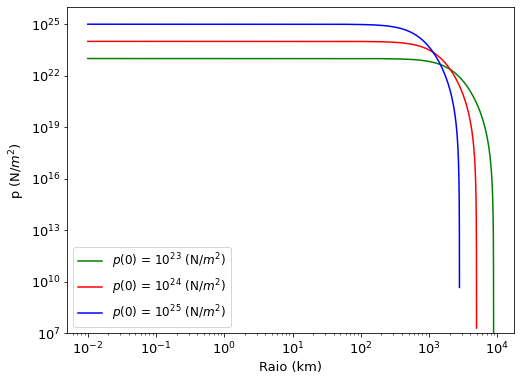

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(df_23_rel['R (km)'],df_23_rel['p (N/m2)'],color ='green',label =r'$p(0)$ = $10^{23}$ (N/$m^2)$')
plt.plot(df_24_rel['R (km)'],df_24_rel['p (N/m2)'],color ='red',label =r'$p(0)$ = $10^{24}$ (N/$m^2)$')
plt.plot(df_25_rel['R (km)'],df_25_rel['p (N/m2)'],color ='blue',label =r'$p(0)$ = $10^{25}$ (N/$m^2)$')
#plt.plot(df_17_rel['R (km)'],df_17_rel['p (N/m2)'],color ='brown',label =r'$p(0)$ = $10^{21}$ (N/$m^2)$')
plt.ylabel(r'p (N/$m^2$)',size = 13)
#plt.xlim(1E-2,1E+5)
plt.ylim(1E+7,1E+26)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Raio (km)',size = 13)

plt.yticks(size = 13)
plt.xticks(size = 13)

plt.legend(loc = 3,prop={'size': 12})


plt.savefig('rP_rel-all-WD.png')
plt.show()

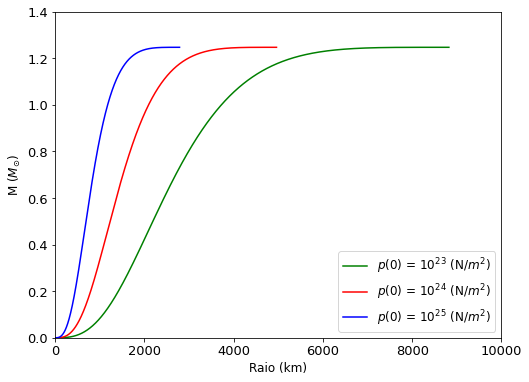

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(df_23_rel['R (km)'],df_23_rel['m (Msol)'],color ='green',label =r'$p(0)$ = $10^{23}$ (N/$m^2)$')
plt.plot(df_24_rel['R (km)'],df_24_rel['m (Msol)'],color ='red',label =r'$p(0)$ = $10^{24}$ (N/$m^2)$')
plt.plot(df_25_rel['R (km)'],df_25_rel['m (Msol)'],color ='blue',label =r'$p(0)$ = $10^{25}$ (N/$m^2)$')
#plt.plot(df_17_rel['R (km)'],df_17_rel['m (Msol)'],color ='brown',label =r'$p(0)$ = $10^{21}$ (N/$m^2)$')
plt.ylabel(r'M $(M_{\odot})$',size = 12)
plt.xlim(0,10000)
plt.ylim(0,1.4)
plt.yticks(size = 13)
plt.xticks(size = 13)
plt.xlabel('Raio (km)',size = 12)
plt.legend(prop={'size': 12})
plt.savefig('rM_rel-all-WD.png')
plt.show()

##Caso não-Relativístico



In [ ]:
#Passo
hn = 0.5 #km

#Funcoes
def fn(R,P,M):
    return -(alfan*(P**un*M))/(R**2)

def gn(R,P,M):
    return betan*R**2*(P**un)

#Condicoes iniciais
R = 1E-2
M = 0
P = 1E-15

#Print das condicoes iniciais
print('P[0]:',P,' M[0]:',M,'  R[0]:',R)

#Abrindo arquivo e salvando CI
with open('WD-NEWTON_nonrel-15.csv', 'a', newline='') as file:
  writter = csv.writer(file)
  writter.writerow(['p (N/m2)','m (Msol)','R (km)'])
  writter.writerow([P*1E+36,M,R])

#Calculando valores de r
while P > 0:             
  k1Pn = hn*fn(R,       P,              M )    
  k1Mn = hn*gn(R,       P,              M)
  k2Pn = hn*fn(R + hn/2, P + k1Pn/2, M + k1Mn/2)
  k2Mn = hn*gn(R + hn/2, P + k1Pn/2, M + k1Mn/2)
  k3Pn = hn*fn(R + hn/2, P + k2Pn/2, M + k2Mn/2)
  k3Mn = hn*gn(R + hn/2, P + k2Pn/2, M + k2Mn/2)
  k4Pn = hn*fn(R + hn,   P + k3Pn, M + k3Mn)
  k4Mn = hn*gn(R + hn,   P + k3Pn, M + k3Mn)
  with open('WD-NEWTON_nonrel-15.csv', 'a', newline='') as file:
    writter = csv.writer(file)
    writter.writerow([P*1E+36,M,R])      
    P = P + (1/6)*(k1Pn + 2*k2Pn + 2*k3Pn + k4Pn)
    M = M + (1/6)*(k1Mn + 2*k2Mn + 2*k3Mn + k4Mn)
    R = R + hn
    #print('P:',P,' M:',M,'  R:',R)

P[0]: 1e-15  M[0]: 0   R[0]: 0.01


TypeError: ignored

In [ ]:
#df_12_naorel = pd.read_csv('WD-NEWTON_nonrel-12.csv')
df_21_naorel = pd.read_csv('WD-NEWTON_nonrel-17.csv')
df_22_naorel = pd.read_csv('WD-NEWTON_nonrel-16.csv')
df_23_naorel = pd.read_csv('WD-NEWTON_nonrel-15.csv')

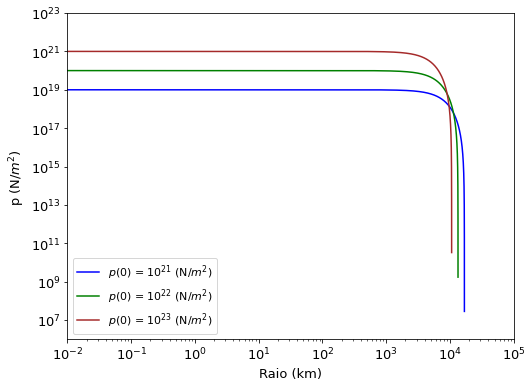

In [ ]:
plt.figure(figsize=(8,6))
#plt.plot(df_12_naorel['R (km)'],df_12_naorel['p (N/m2)'],color ='red',label =r'$p(0)$ = $10^{24}$ (N/$m^2)$')
plt.plot(df_21_naorel['R (km)'],df_21_naorel['p (N/m2)'],color ='blue',label =r'$p(0)$ = $10^{21}$ (N/$m^2)$')
plt.plot(df_22_naorel['R (km)'],df_22_naorel['p (N/m2)'],color ='green',label =r'$p(0)$ = $10^{22}$ (N/$m^2)$')
plt.plot(df_23_naorel['R (km)'],df_23_naorel['p (N/m2)'],color ='brown',label =r'$p(0)$ = $10^{23}$ (N/$m^2)$')
plt.ylabel(r'p (N/$m^2$)', size = 13)
plt.xlim(1E-2,1E+5)
plt.ylim(1E+6,1E+23)

plt.yticks(size = 13)
plt.xticks(size = 13)

plt.yscale('log')
plt.xscale('log')
plt.xlabel('Raio (km)',size = 13)
plt.legend(loc = 3,prop={'size': 11})
plt.savefig('rP_nonrel-all-WD.png')
plt.show()

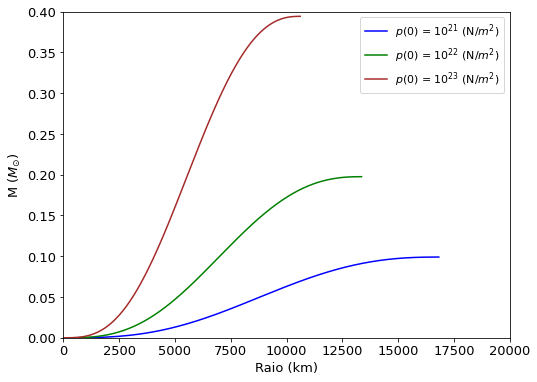

In [ ]:
plt.figure(figsize=(8,6))
#plt.plot(df_12_naorel['R (km)'],df_12_naorel['m (Msol)'],color ='red',label =r'$p(0)$ = $10^{24}$ (N/$m^2)$')
plt.plot(df_21_naorel['R (km)'],df_21_naorel['m (Msol)'],color ='blue',label =r'$p(0)$ = $10^{21}$ (N/$m^2)$')
plt.plot(df_22_naorel['R (km)'],df_22_naorel['m (Msol)'],color ='green',label =r'$p(0)$ = $10^{22}$ (N/$m^2)$')
plt.plot(df_23_naorel['R (km)'],df_23_naorel['m (Msol)'],color ='brown',label =r'$p(0)$ = $10^{23}$ (N/$m^2)$')
plt.ylabel(r'M $(M_{\odot})$', size = 13)
plt.xlim(0,20000)
plt.ylim(0,0.4)

plt.yticks(size = 13)
plt.xticks(size = 13)

plt.xlabel('Raio (km)', size = 13)
plt.legend(prop={'size': 11})
plt.savefig('rM_nonrel-all-WD.png')
plt.show()

# Plots

###1E+25



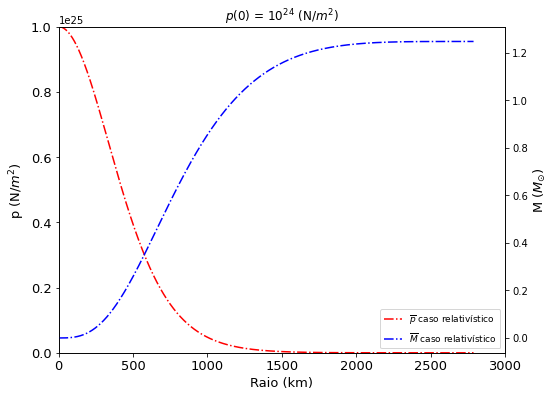

In [ ]:
fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(111)

ax.set_title(r'$p(0)$ = 10$^{24}$ (N/$m^2)$')
#lns1 = ax.plot(df_23_naorel['R (km)'],df_23_naorel['p (N/m2)'],color ='red', linestyle='-', label = r'$\overline{p}$ caso não-relativístico')
lns2 = ax.plot(df_25_rel['R (km)'],df_25_rel['p (N/m2)'],color ='red', linestyle='-.', label = r'$\overline{p}$ caso relativístico')
ax.set_ylabel(r'p (N/$m^2)$', size = 13)
plt.ylim(0,1E+25)
plt.xlim(0,3000)

plt.yticks(size = 13)
plt.xticks(size = 13)

ax2 = ax.twinx()
#lns3 = ax2.plot(df_23_naorel['R (km)'],df_23_naorel['m (Msol)'],color ='blue', label = r'$\overline{M}$ caso não-relativístico',ls = '-')
lns4 = ax2.plot(df_25_rel['R (km)'],df_25_rel['m (Msol)'],color ='blue', label = r'$\overline{M}$ caso relativístico',ls = '-.')

ax2.set_ylabel(r'M $(M_{\odot})$', size = 13)
ax.set_xlabel('Raio (km)', size = 13)
lns = lns2+lns4
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc = 4, prop={'size': 9})
#plt.xlim(0,7000)

fig.savefig('WD-25.png')

###1E+24



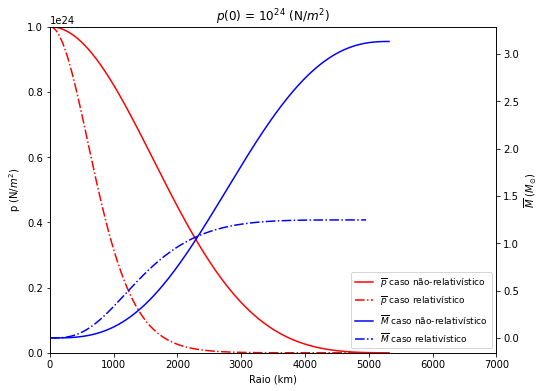

In [ ]:
fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(111)

ax.set_title(r'$p(0)$ = 10$^{24}$ (N/$m^2)$')
lns1 = ax.plot(df_12_naorel['R (km)'],df_12_naorel['pbar'],color ='red', linestyle='-', label = r'$\overline{p}$ caso não-relativístico')
lns2 = ax.plot(df_14_rel['R (km)'],df_14_rel['pbar'],color ='red', linestyle='-.', label = r'$\overline{p}$ caso relativístico')
ax.set_ylabel(r'p (N/$m^2)$')
plt.ylim(0,1E+24)

ax2 = ax.twinx()
lns3 = ax2.plot(df_12_naorel['R (km)'],df_12_naorel['mbar (Msol)'],color ='blue', label = r'$\overline{M}$ caso não-relativístico',ls = '-')
lns4 = ax2.plot(df_14_rel['R (km)'],df_14_rel['mbar (Msol)'],color ='blue', label = r'$\overline{M}$ caso relativístico',ls = '-.')

ax2.set_ylabel(r'$\overline{M}$ $(M_{\odot})$')
ax.set_xlabel('Raio (km)')
lns = lns1+lns2+lns3+lns4
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc = 4, prop={'size': 9})
plt.xlim(0,7000)

fig.savefig('WD-24.png')

###1E+23



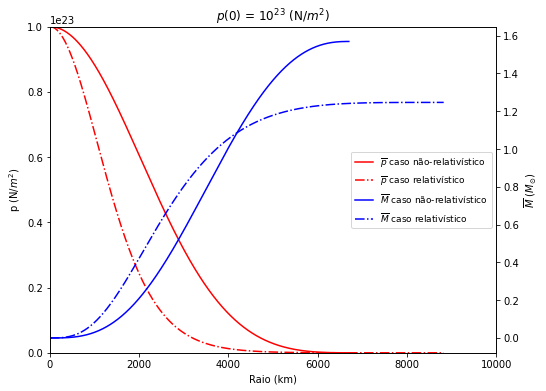

In [ ]:
fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(111)

ax.set_title(r'$p(0)$ = 10$^{23}$ (N/$m^2)$')
lns1 = ax.plot(df_13_naorel['R (km)'],df_13_naorel['pbar'],color ='red', linestyle='-', label = r'$\overline{p}$ caso não-relativístico')
lns2 = ax.plot(df_15_rel['R (km)'],df_15_rel['pbar'],color ='red', linestyle='-.', label = r'$\overline{p}$ caso relativístico')
ax.set_ylabel(r'p (N/$m^2)$')
plt.ylim(0,1E+23)

ax2 = ax.twinx()
lns3 = ax2.plot(df_13_naorel['R (km)'],df_13_naorel['mbar (Msol)'],color ='blue', label = r'$\overline{M}$ caso não-relativístico',ls = '-')
lns4 = ax2.plot(df_15_rel['R (km)'],df_15_rel['mbar (Msol)'],color ='blue', label = r'$\overline{M}$ caso relativístico',ls = '-.')

ax2.set_ylabel(r'$\overline{M}$ $(M_{\odot})$')
ax.set_xlabel('Raio (km)')
lns = lns1+lns2+lns3+lns4
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc = 5, prop={'size': 9})
plt.xlim(0,10000)

fig.savefig('WD-23.png')

###1E+22



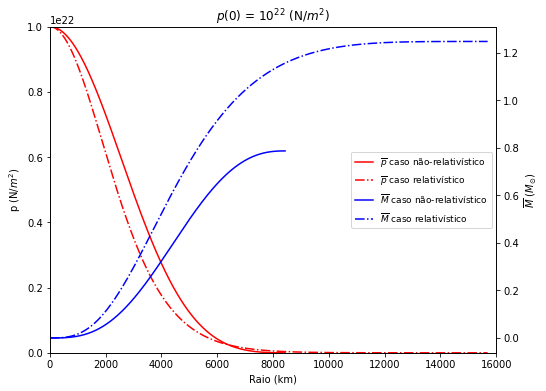

In [ ]:
fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(111)

ax.set_title(r'$p(0)$ = 10$^{22}$ (N/$m^2)$')
lns1 = ax.plot(df_14_naorel['R (km)'],df_14_naorel['pbar'],color ='red', linestyle='-', label = r'$\overline{p}$ caso não-relativístico')
lns2 = ax.plot(df_16_rel['R (km)'],df_16_rel['pbar'],color ='red', linestyle='-.', label = r'$\overline{p}$ caso relativístico')
ax.set_ylabel(r'p (N/$m^2)$')
plt.ylim(0,1E+22)

ax2 = ax.twinx()
lns3 = ax2.plot(df_14_naorel['R (km)'],df_14_naorel['mbar (Msol)'],color ='blue', label = r'$\overline{M}$ caso não-relativístico',ls = '-')
lns4 = ax2.plot(df_16_rel['R (km)'],df_16_rel['mbar (Msol)'],color ='blue', label = r'$\overline{M}$ caso relativístico',ls = '-.')

ax2.set_ylabel(r'$\overline{M}$ $(M_{\odot})$')
ax.set_xlabel('Raio (km)')
lns = lns1+lns2+lns3+lns4
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc = 5, prop={'size': 9})
plt.xlim(0,16000)

fig.savefig('WD-22.png')

###1E+21



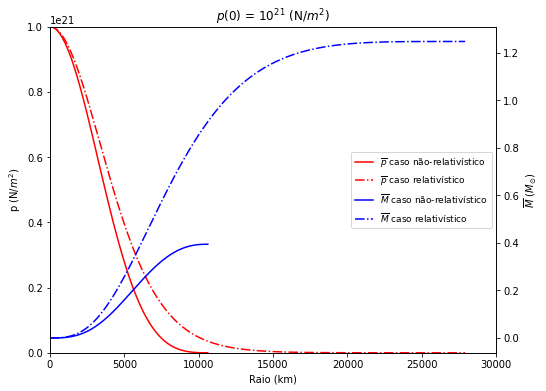

In [ ]:
fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(111)

ax.set_title(r'$p(0)$ = 10$^{21}$ (N/$m^2)$')
lns1 = ax.plot(df_15_naorel['R (km)'],df_15_naorel['pbar'],color ='red', linestyle='-', label = r'$\overline{p}$ caso não-relativístico')
lns2 = ax.plot(df_17_rel['R (km)'],df_17_rel['pbar'],color ='red', linestyle='-.', label = r'$\overline{p}$ caso relativístico')
ax.set_ylabel(r'p (N/$m^2)$')
plt.ylim(0,1E+21)

ax2 = ax.twinx()
lns3 = ax2.plot(df_15_naorel['R (km)'],df_15_naorel['mbar (Msol)'],color ='blue', label = r'$\overline{M}$ caso não-relativístico',ls = '-')
lns4 = ax2.plot(df_17_rel['R (km)'],df_17_rel['mbar (Msol)'],color ='blue', label = r'$\overline{M}$ caso relativístico',ls = '-.')

ax2.set_ylabel(r'$\overline{M}$ $(M_{\odot})$')
ax.set_xlabel('Raio (km)')
lns = lns1+lns2+lns3+lns4
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc = 5, prop={'size': 9})
plt.xlim(0,30000)

fig.savefig('WD-21.png')